## Companion notebook for "Enhancing reproducibility in bioimage analysis: focus on controls and effect sizes, not just p-values"

In this notebook, you will be able to explore the data and graphs shown in the paper titled "Enhancing reproducibility in bioimage analysis: focus on controls
and effect sizes, not just p-values".

#### Import utility functions

In [1]:
import pandas as pd

from utility_functions import *

#### Set up parameters for plots

In [2]:
plt.rcParams['font.size'] = 26
plt.rcParams['axes.linewidth'] = 2
color_dict = {'ARAP2': 'orange',
              'YAP': 'blue',
              'MOCK': 'gray',
              'LATS1': 'purple'}
y_label = 'Relative Nuclear YAPTAZ Localisation'

#### Set up variables

In [3]:
plate_ID = '2A'
plate_name = f'LM2_GEFGAP_ONTARGETPlus_{plate_ID}'
plate_index = f'LM2_ONTARGETPlus_{plate_ID}'
treatment_col = 'Treatment'
variable_of_interest = 'YAPTAZ_Ratio'
idr_annotations_file_path = '../inputs/idr/idr0028-screenB-annotation.csv'
#directories = ('../inputs/idr', '../outputs/plots', '../outputs/data')

#### Load CellProfile analysis output

In [4]:
annotations = load_and_prepare_data(idr_annotations_file_path, plate_index)
compounds = annotations[annotations['Control Type'] == 'Treated'].set_index('Well')['Gene Symbol'].to_dict()
treatments_to_compounds = {'Treated': 'Treated', 'negative control': 'Neg Control',
                           'technical control': 'Tech Control', 'positive control': 'Pos Control'}
image_data = pd.read_csv(f'../inputs/cell_profiler_outputs/idr0028/screenB/{plate_name}/Image.csv')
nuc_data = pd.read_csv(f'../inputs/cell_profiler_outputs/idr0028/screenB/{plate_name}/Nuclei.csv')
cyto_data = pd.read_csv(f'../inputs/cell_profiler_outputs/idr0028/screenB/{plate_name}/Cytoplasm.csv')
image_indices = pd.read_csv(f'../inputs/idr/{plate_name}_ImageIndex.ColumbusIDX.csv', delimiter='\t')
treatments = annotations.set_index('Well')['Gene Symbol'].to_dict()
controls = annotations.set_index('Well')['Control Type'].to_dict()
qc = annotations.set_index('Well')['Quality Control'].to_dict()

#### Select data subsets

In [5]:
data_subset = prepare_data(nuc_data, cyto_data, image_data, image_indices, treatments, plate_name, qc, treatments_to_compounds,
                           compounds,
                           ['C13', 'K16', 'N23', 'J23'])

#### Plot figures
##### Figure 2A-F

In [ ]:
point_size = 8
random_seed = 42
for s in [50, 200]:
    if s > 50:
        point_size = 4
    for i in range(3):
        generate_swarmplot(['LATS1', 'ARAP2', 'MOCK', 'YAP'], data_subset, color_dict,
                           treatment_col, variable_of_interest, y_label,
                           point_size=point_size, random_seed=random_seed, sample_size=s)
        random_seed = random_seed + 1

##### FIGURE 2 G - I

In [ ]:
plot_effect_size_v_sample_size([*range(10, 500, 10)], 100, data_subset, treatment_col, variable_of_interest,
                               'Median Effect Size Relative to Untreated', ['ARAP2', 'YAP', 'LATS1'])

##### Figure 3A

In [ ]:
plot_iqr_v_sample_size([*range(10, 500, 10)], 100, data_subset, treatment_col, variable_of_interest,
                       'Error in Inter-Quartile Range')

##### Figure 3B-H

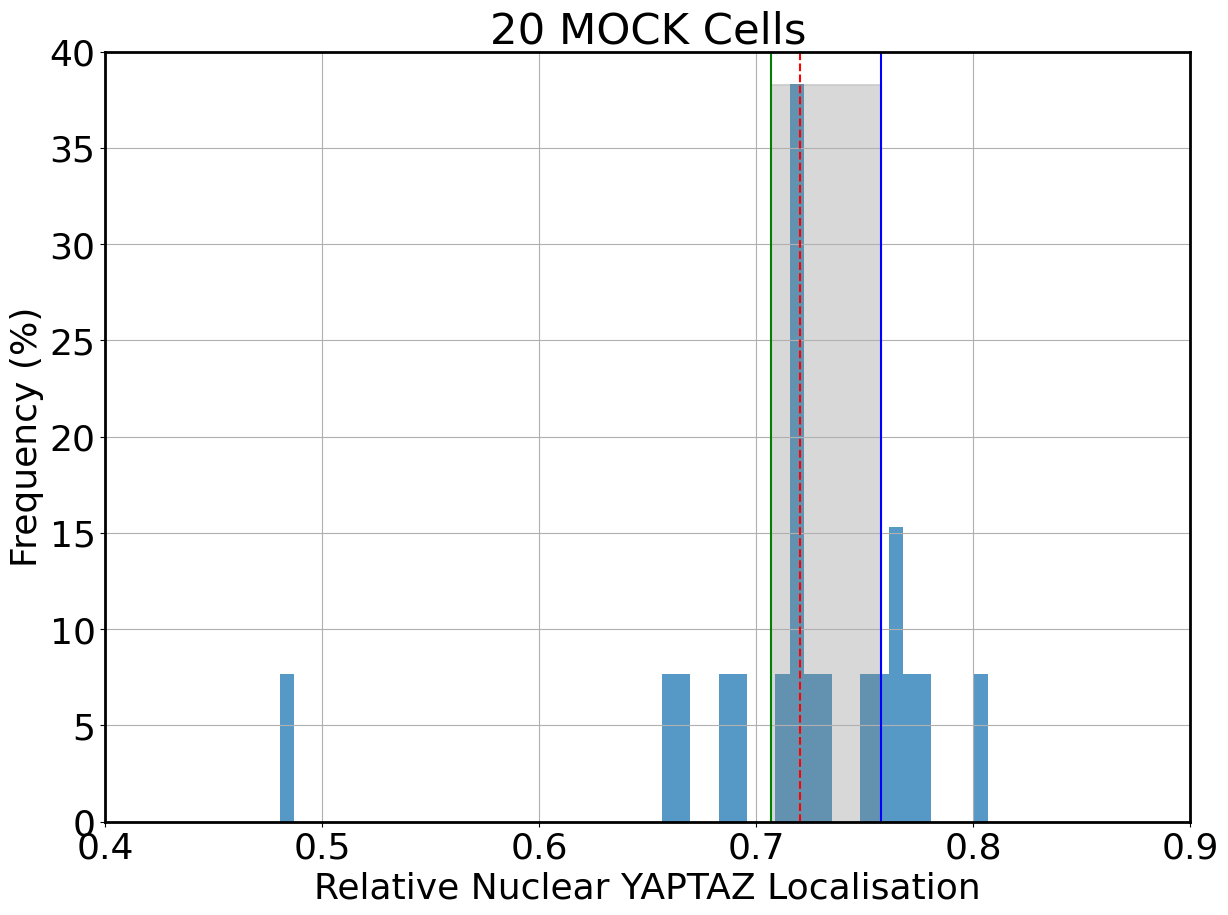

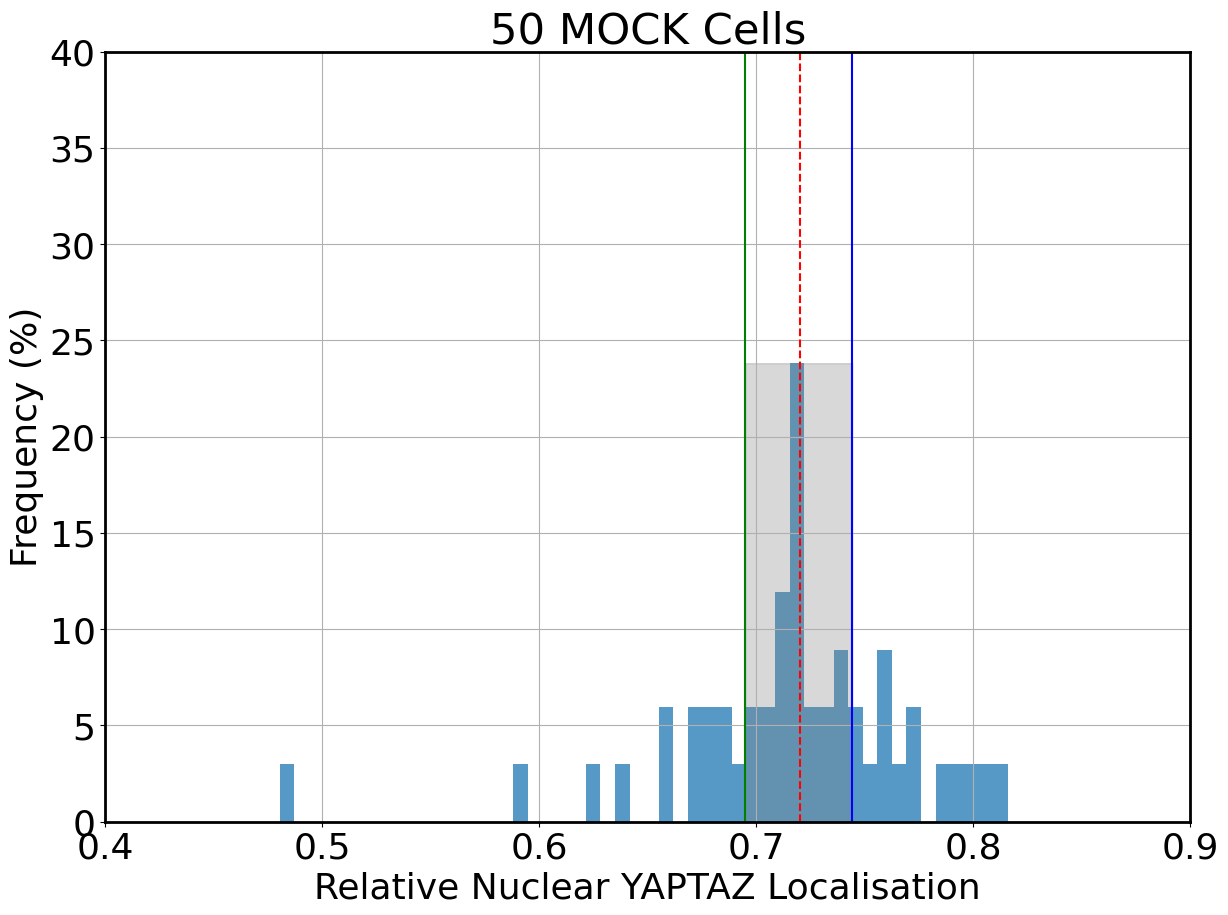

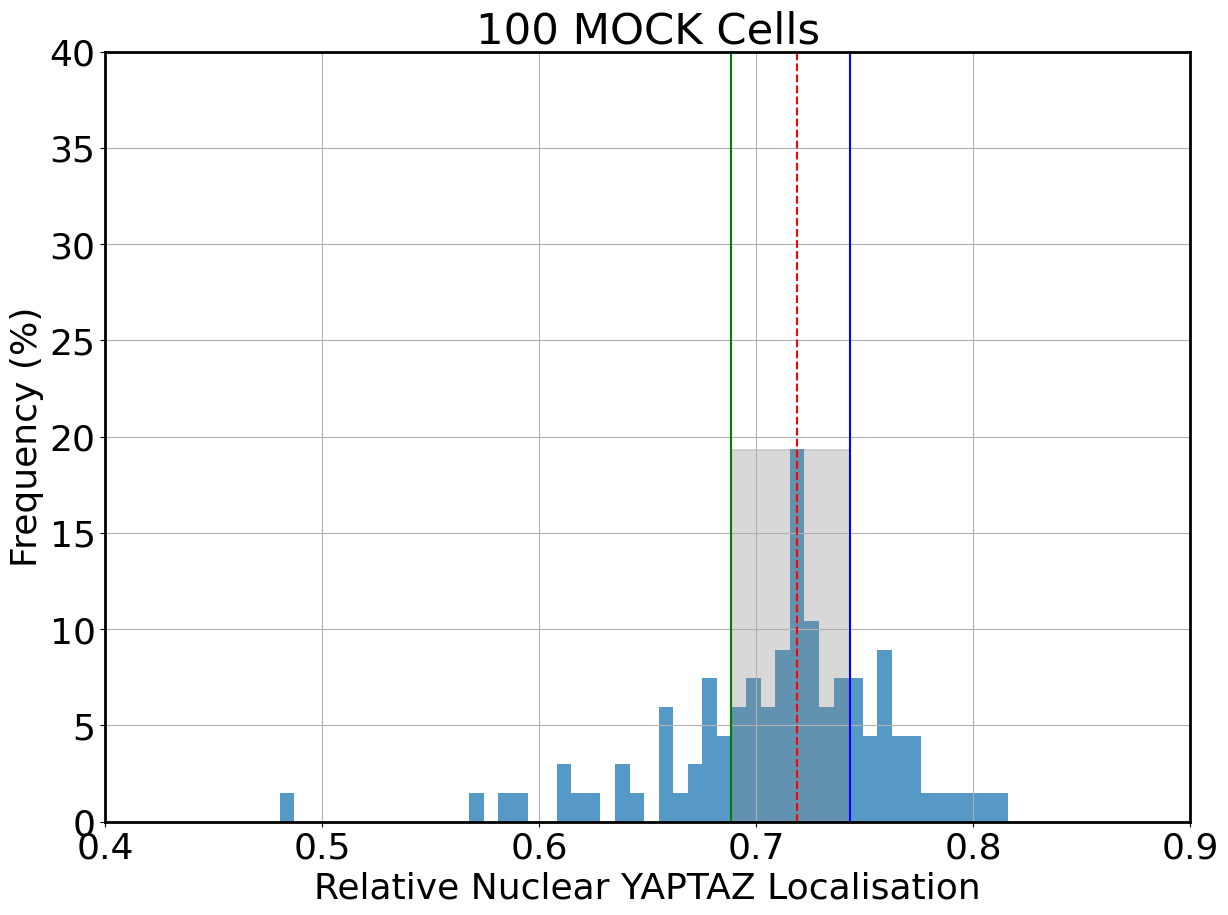

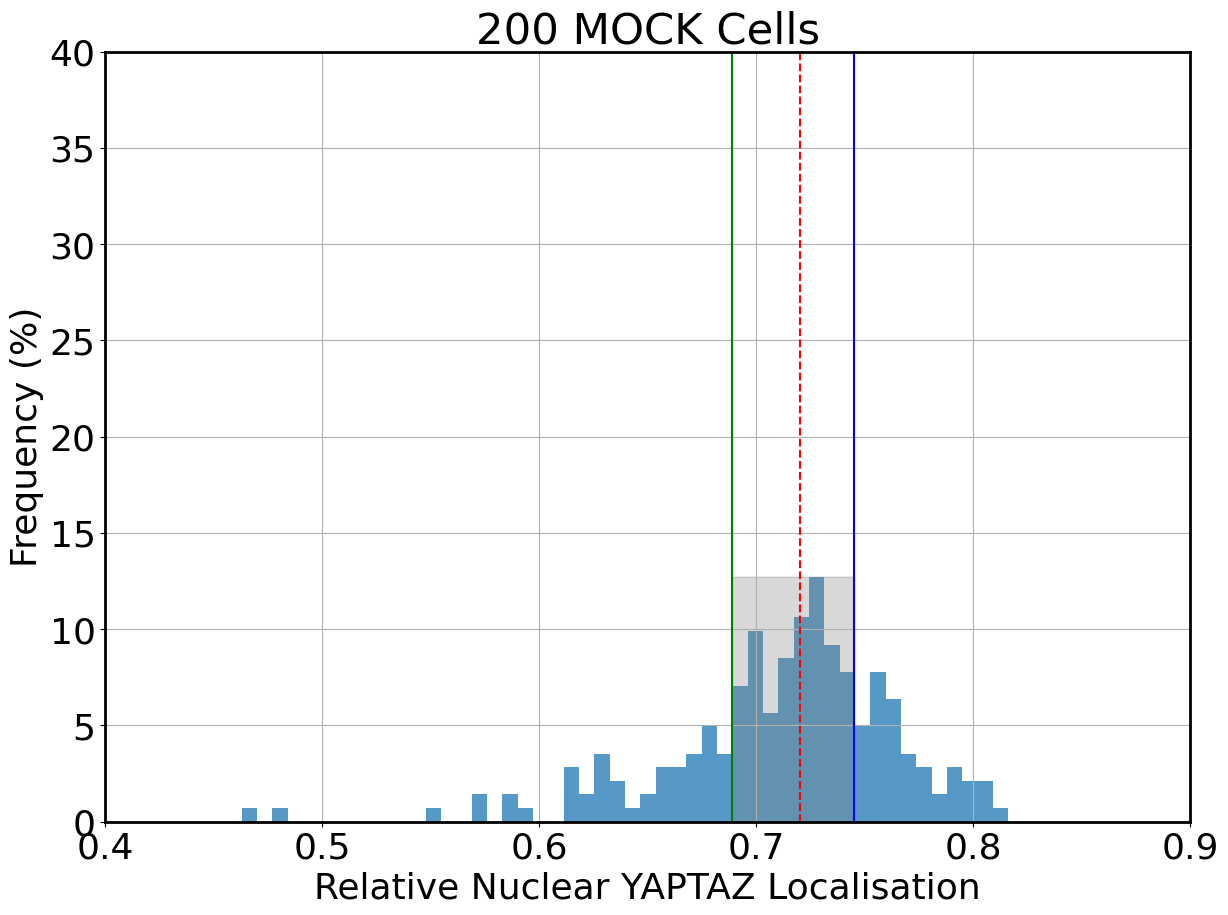

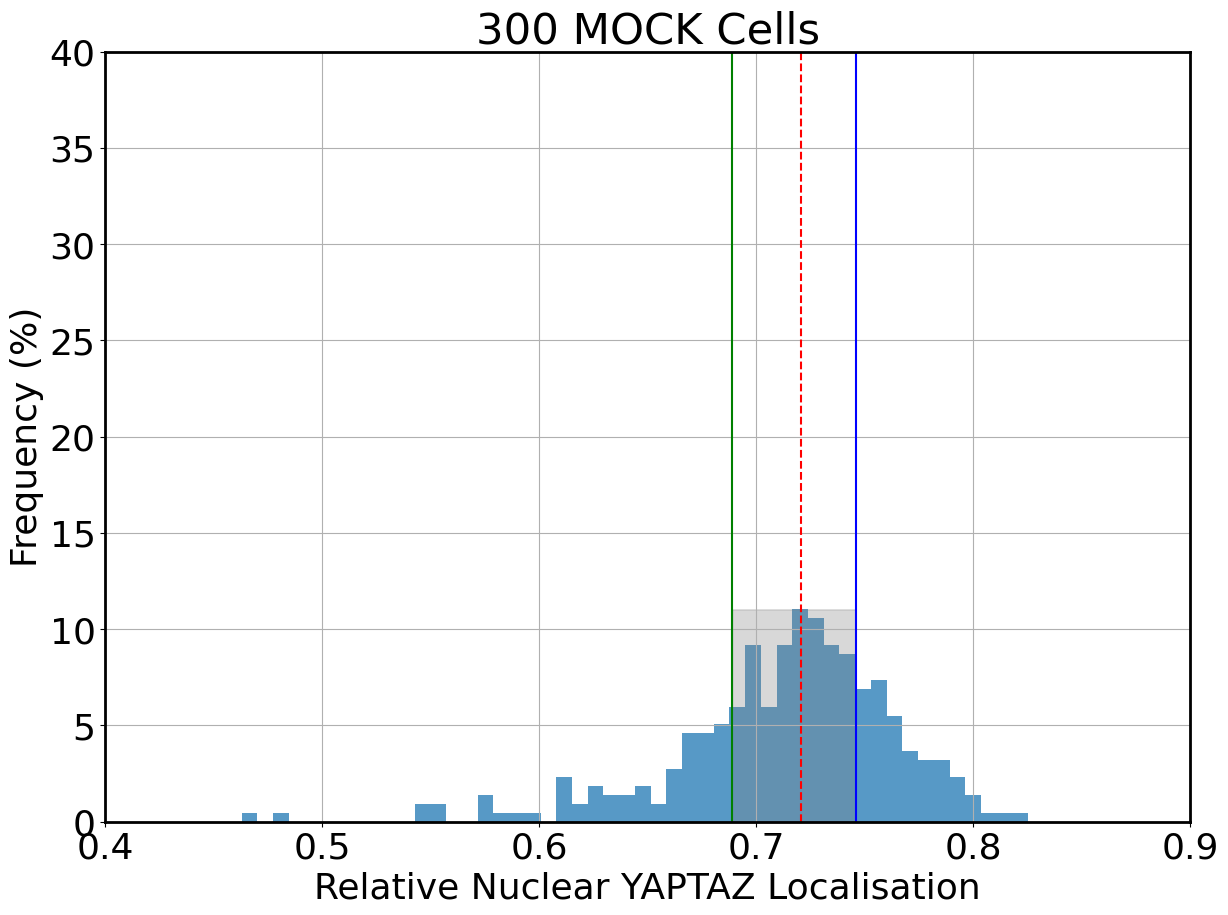

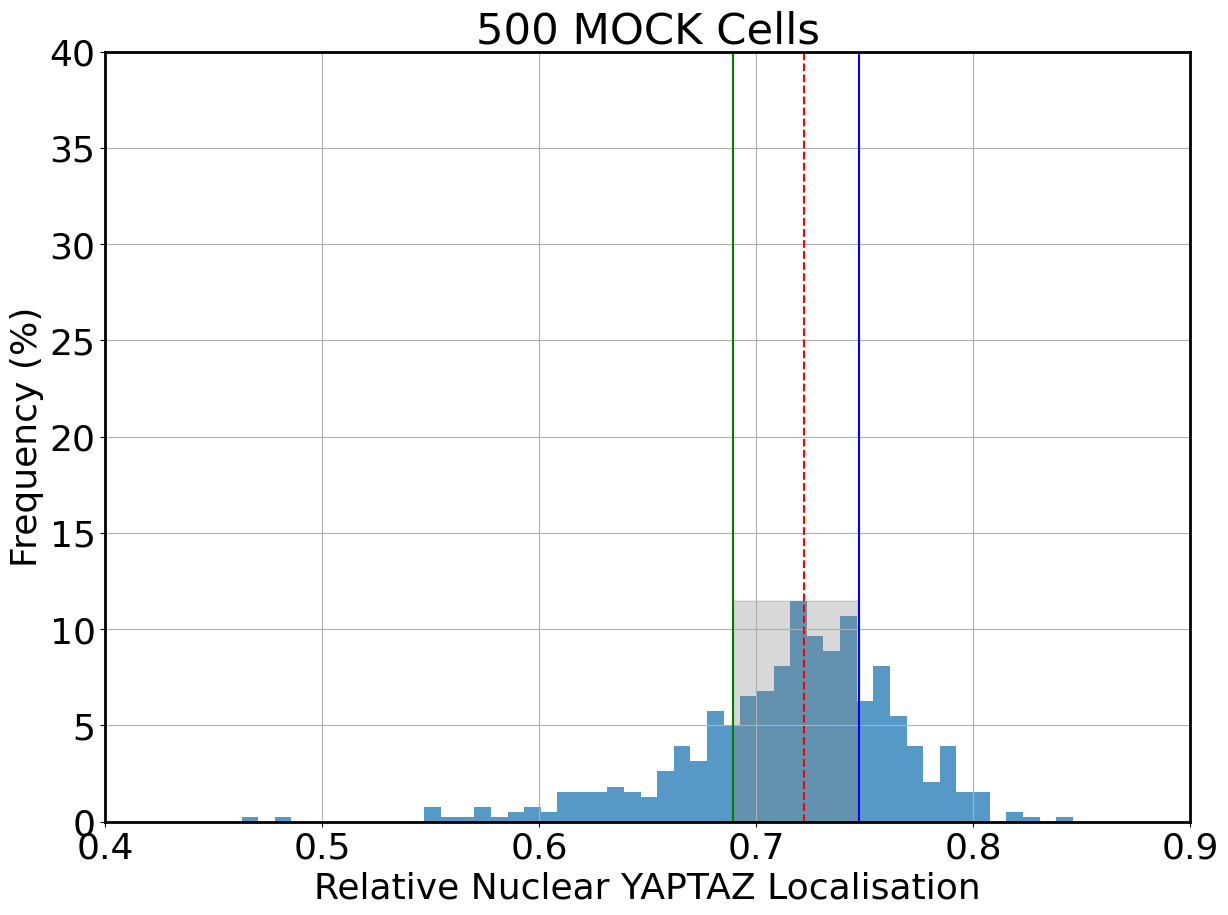

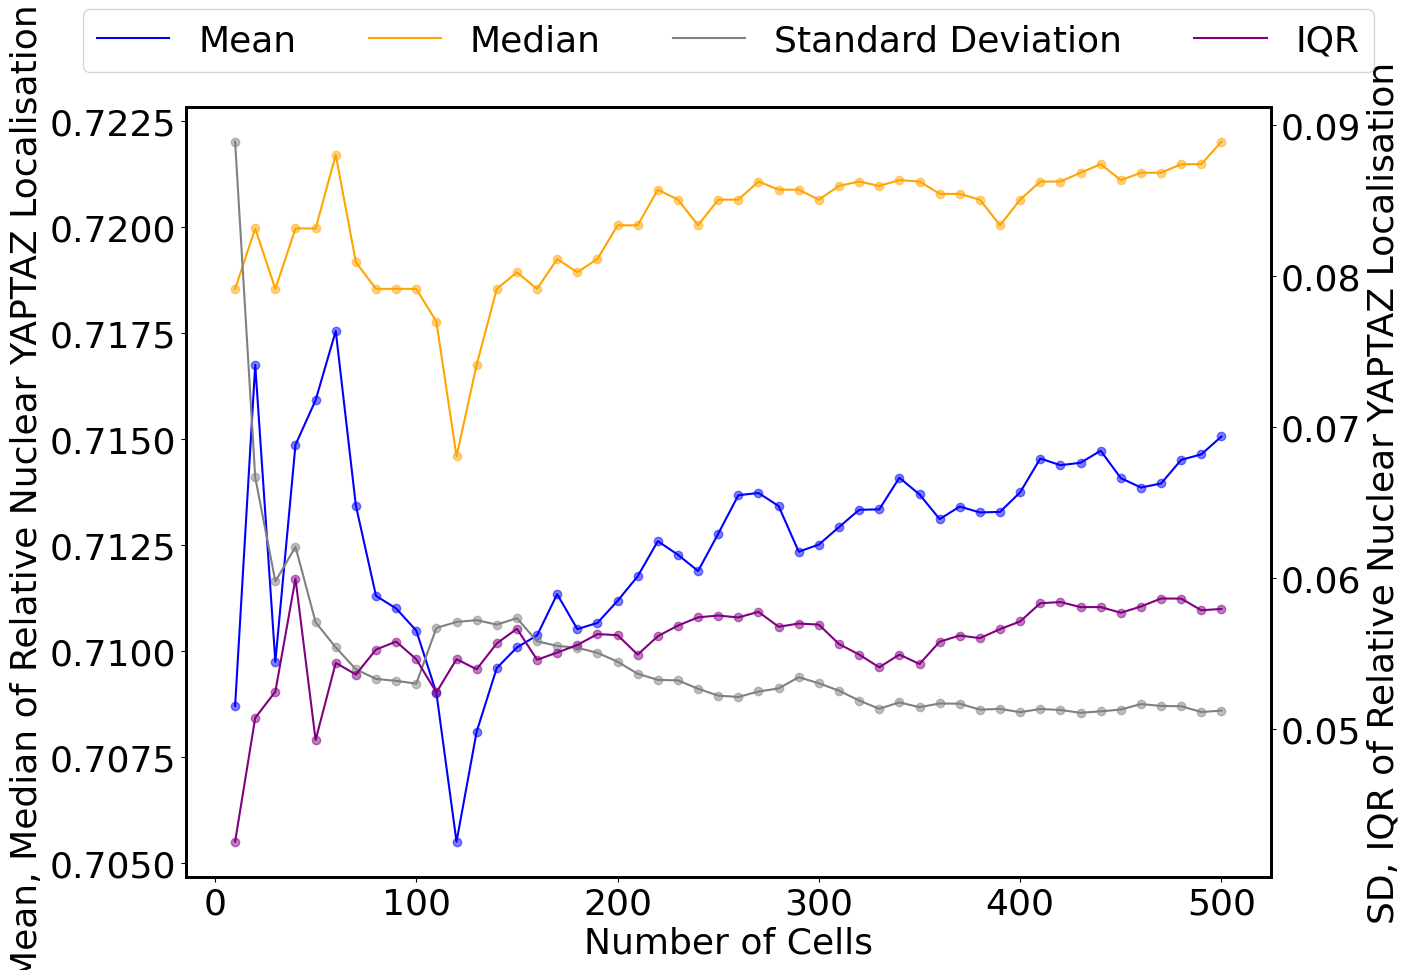

In [6]:
plot_cumulative_histogram_samples(data_subset, variable_of_interest, treatment_col, 'MOCK', y_label)

In [7]:
plate_IDs = ['1A', '2A', '2B']
wells_per_plate = {'1A': ['I23', 'J23', 'M23', 'N23', 'B06'], '2A': ['C13', 'J23', 'N23', 'K16'], '2B': ['C13', 'C17', 'P13']}
all_data = pd.DataFrame()
for plate_ID in plate_IDs:
    plate_name = f'LM2_GEFGAP_ONTARGETPlus_{plate_ID}'
    plate_index = f'LM2_ONTARGETPlus_{plate_ID}'
    treatment_col = 'Treatment'
    variable_of_interest = 'YAPTAZ_Ratio'
    idr_annotations_file_path = '../inputs/idr/idr0028-screenB-annotation.csv'
    annotations = load_and_prepare_data(idr_annotations_file_path, plate_index)
    compounds = annotations[annotations['Control Type'] == 'Treated'].set_index('Well')['Gene Symbol'].to_dict()
    treatments_to_compounds = {'Treated': 'Treated', 'negative control': 'Neg Control',
                               'technical control': 'Tech Control', 'positive control': 'Pos Control'}
    image_data = pd.read_csv(f'../inputs/cell_profiler_outputs/idr0028/screenB/{plate_name}/Image.csv')
    nuc_data = pd.read_csv(f'../inputs/cell_profiler_outputs/idr0028/screenB/{plate_name}/Nuclei.csv')
    cyto_data = pd.read_csv(f'../inputs/cell_profiler_outputs/idr0028/screenB/{plate_name}/Cytoplasm.csv')
    image_indices = pd.read_csv(f'../inputs/idr/{plate_name}_ImageIndex.ColumbusIDX.csv', delimiter='\t')
    treatments = annotations.set_index('Well')['Gene Symbol'].to_dict()
    controls = annotations.set_index('Well')['Control Type'].to_dict()
    qc = annotations.set_index('Well')['Quality Control'].to_dict()
    data_subset = prepare_data(nuc_data, cyto_data, image_data, image_indices, treatments, plate_name, qc, treatments_to_compounds,
                               compounds,
                               wells_per_plate.get(plate_ID))
    data_subset['Well'] = data_subset['Well'].apply(lambda x: plate_ID + '_' + x)
    all_data = pd.concat([all_data, data_subset])

##### Figure 4A-C

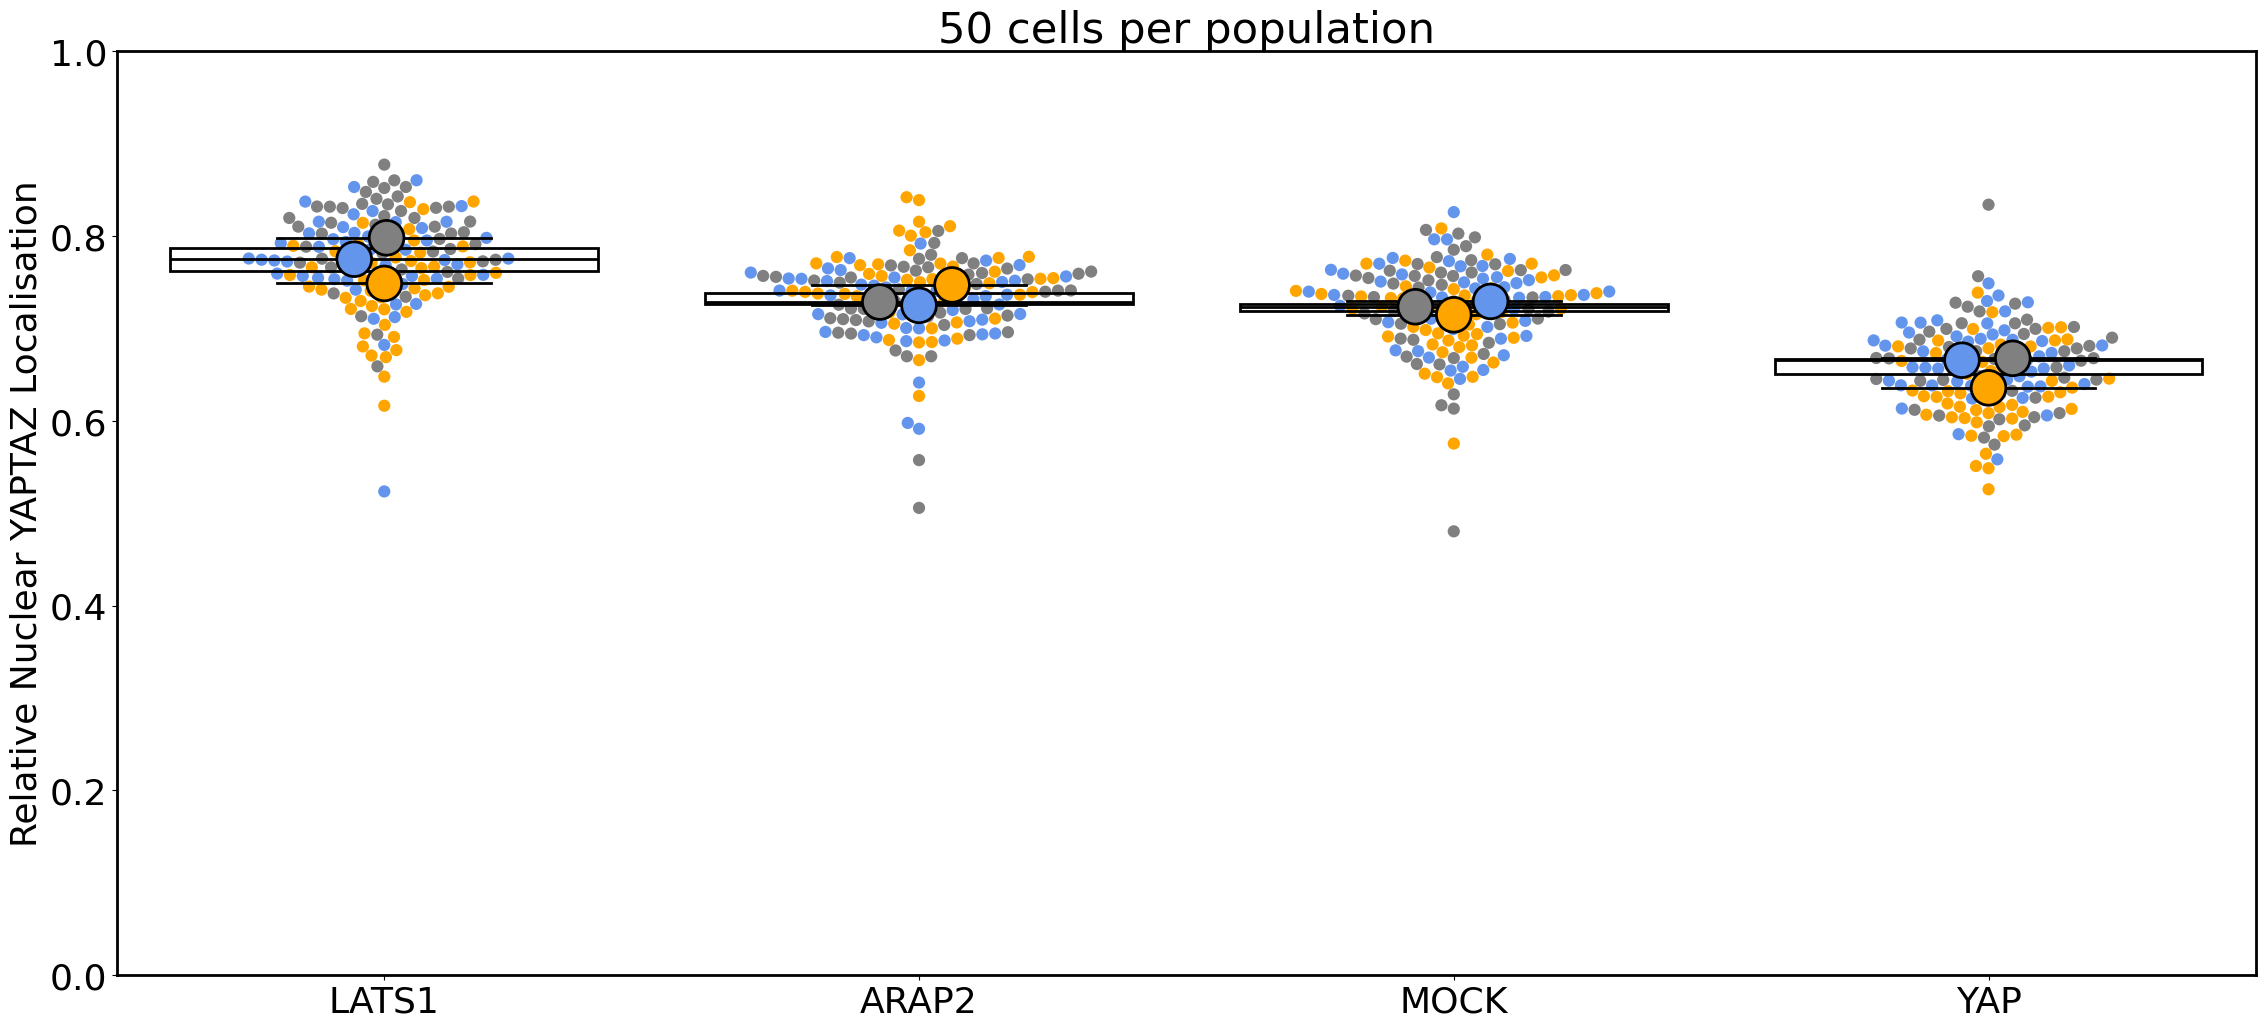

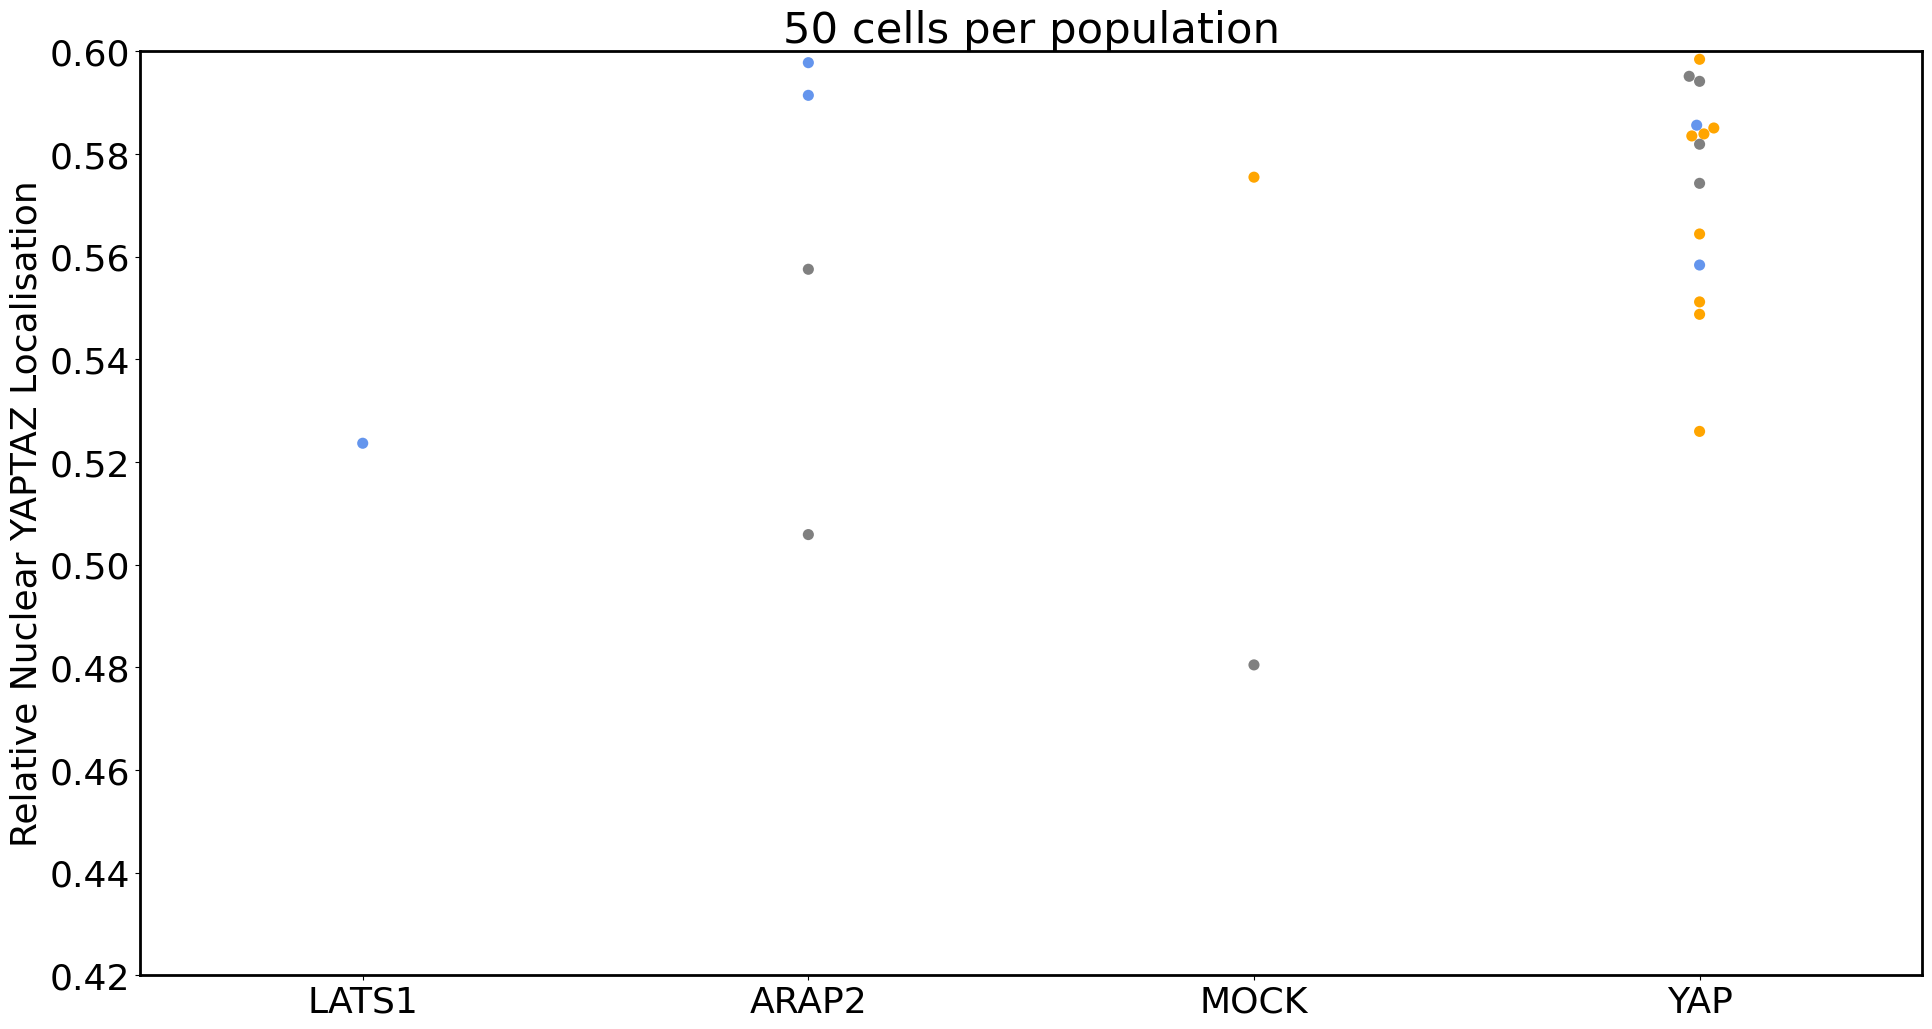

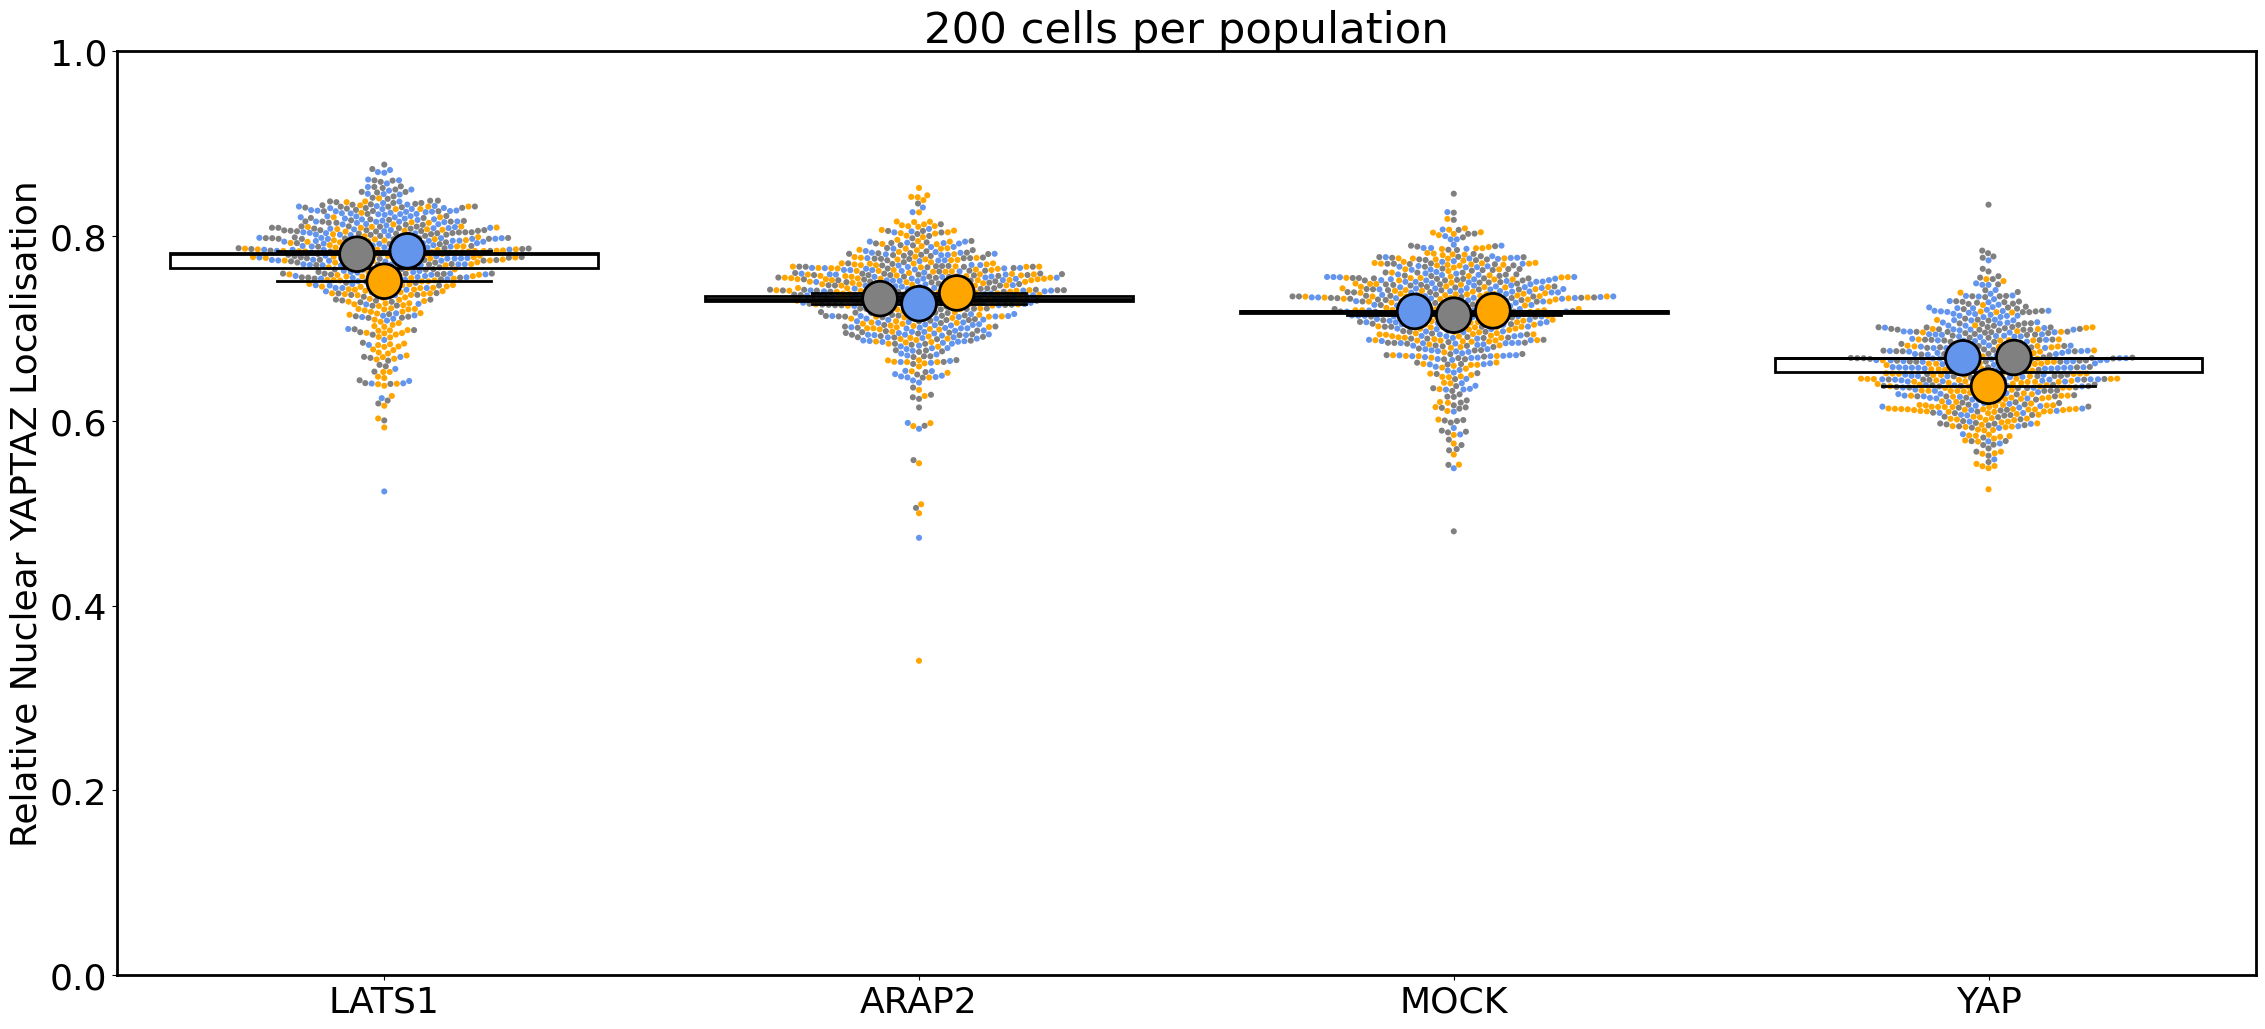

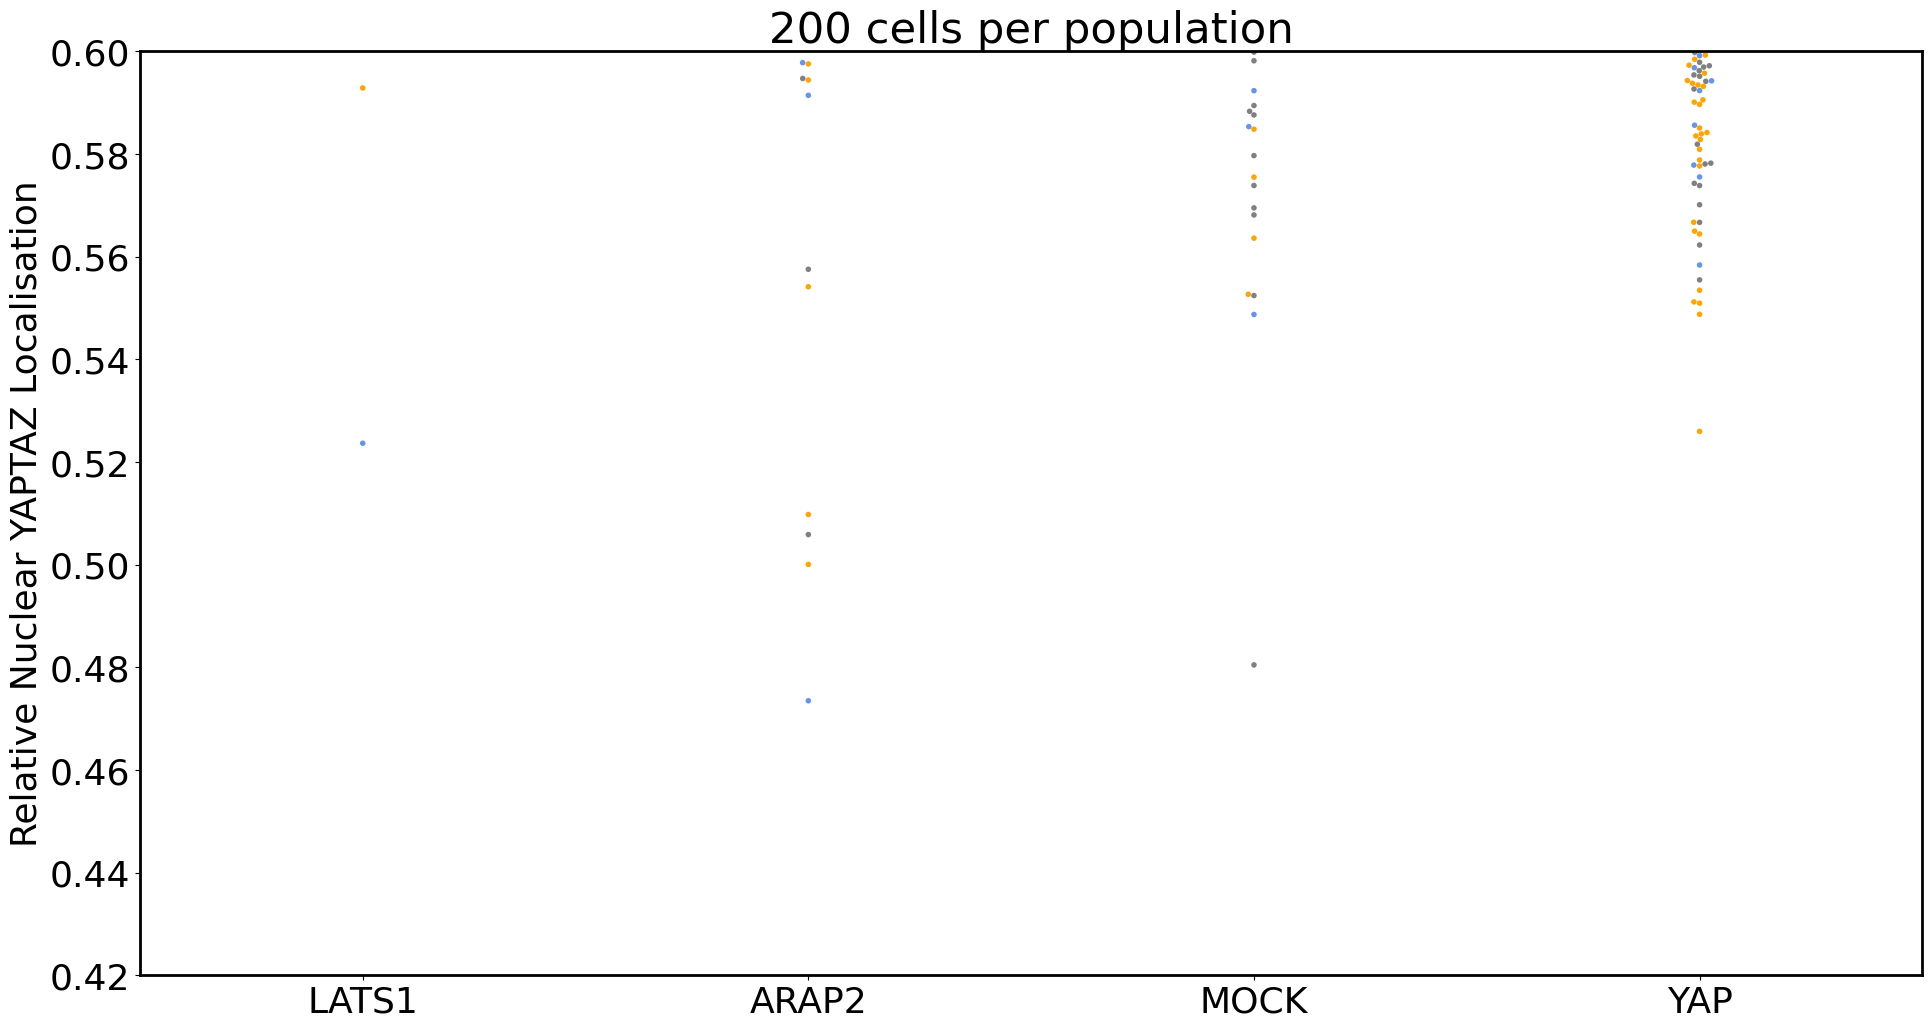

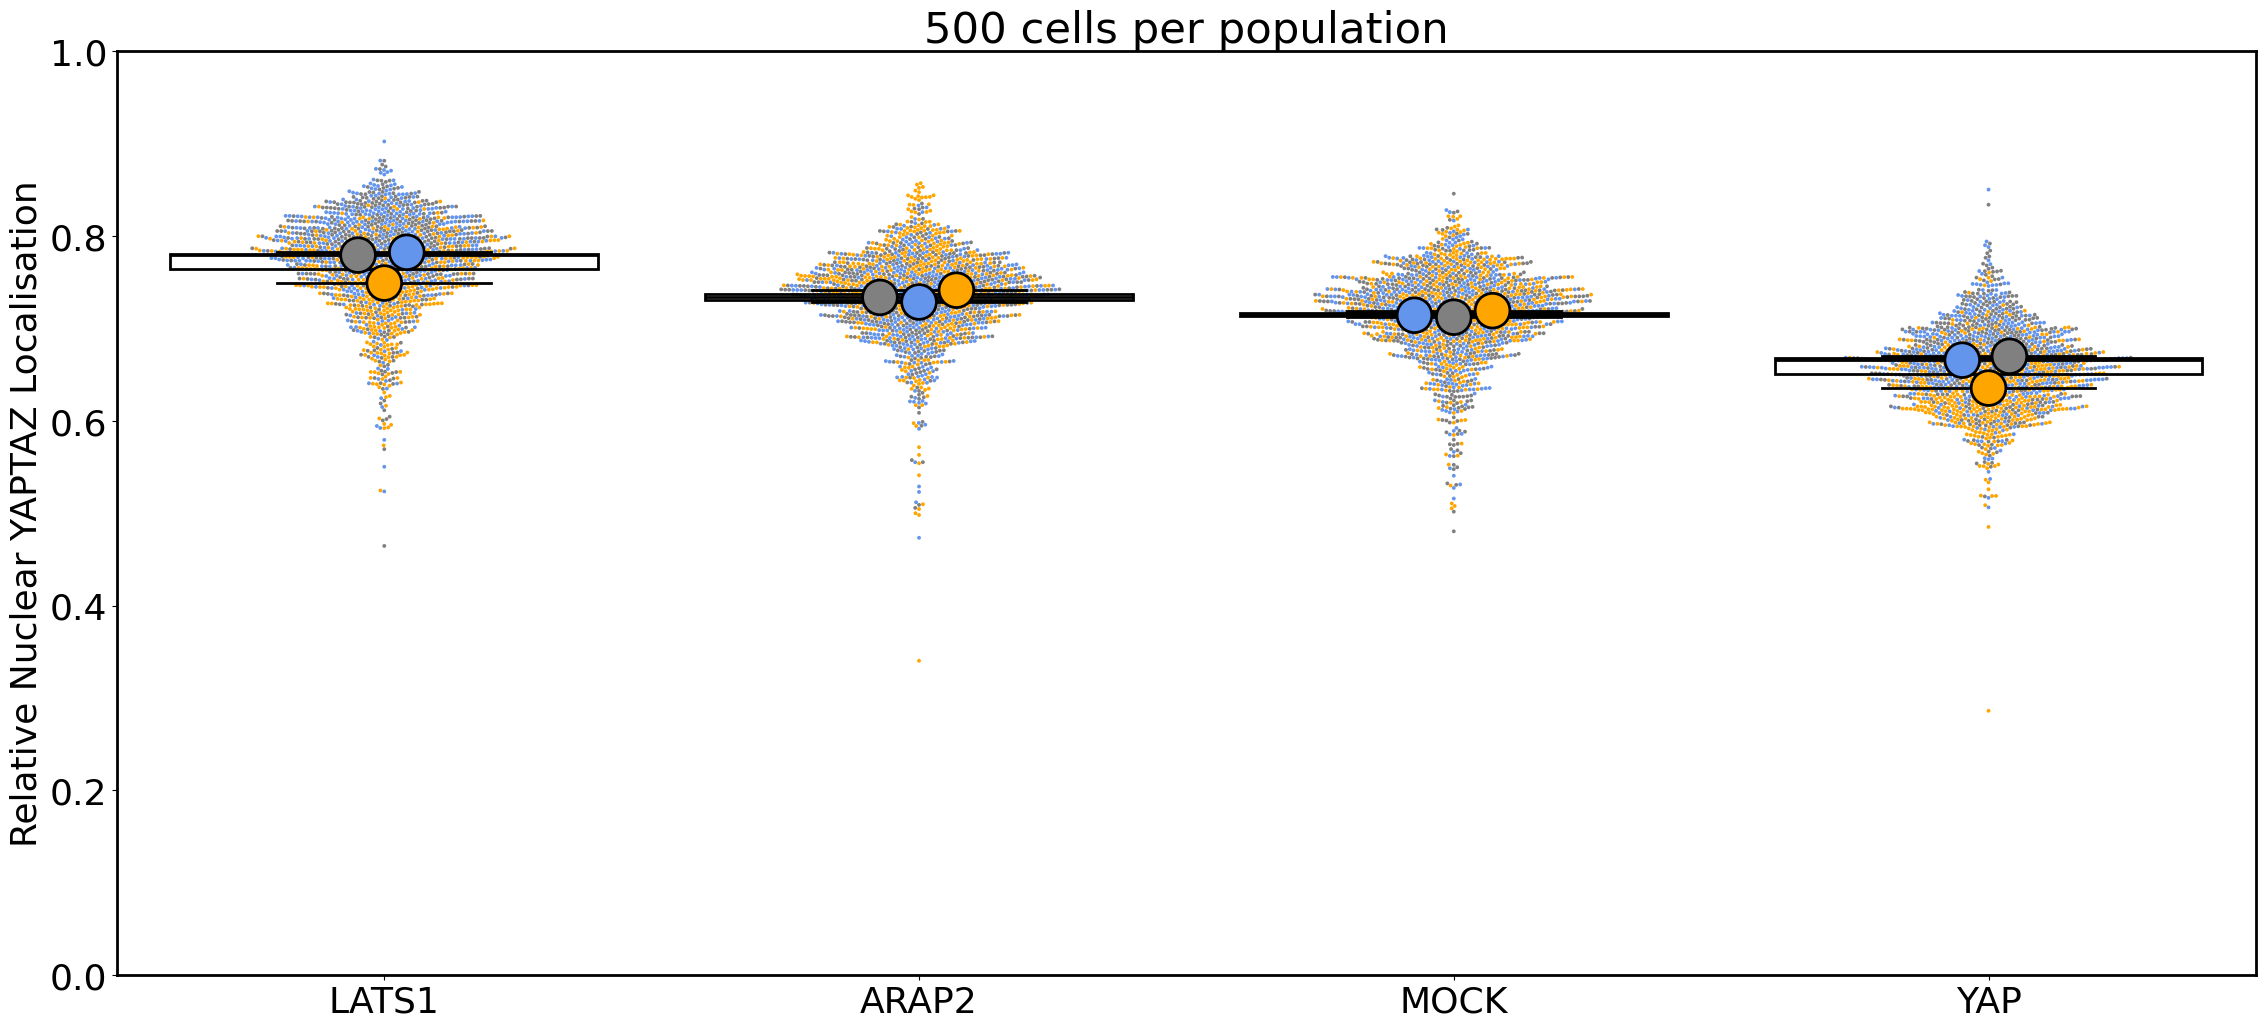

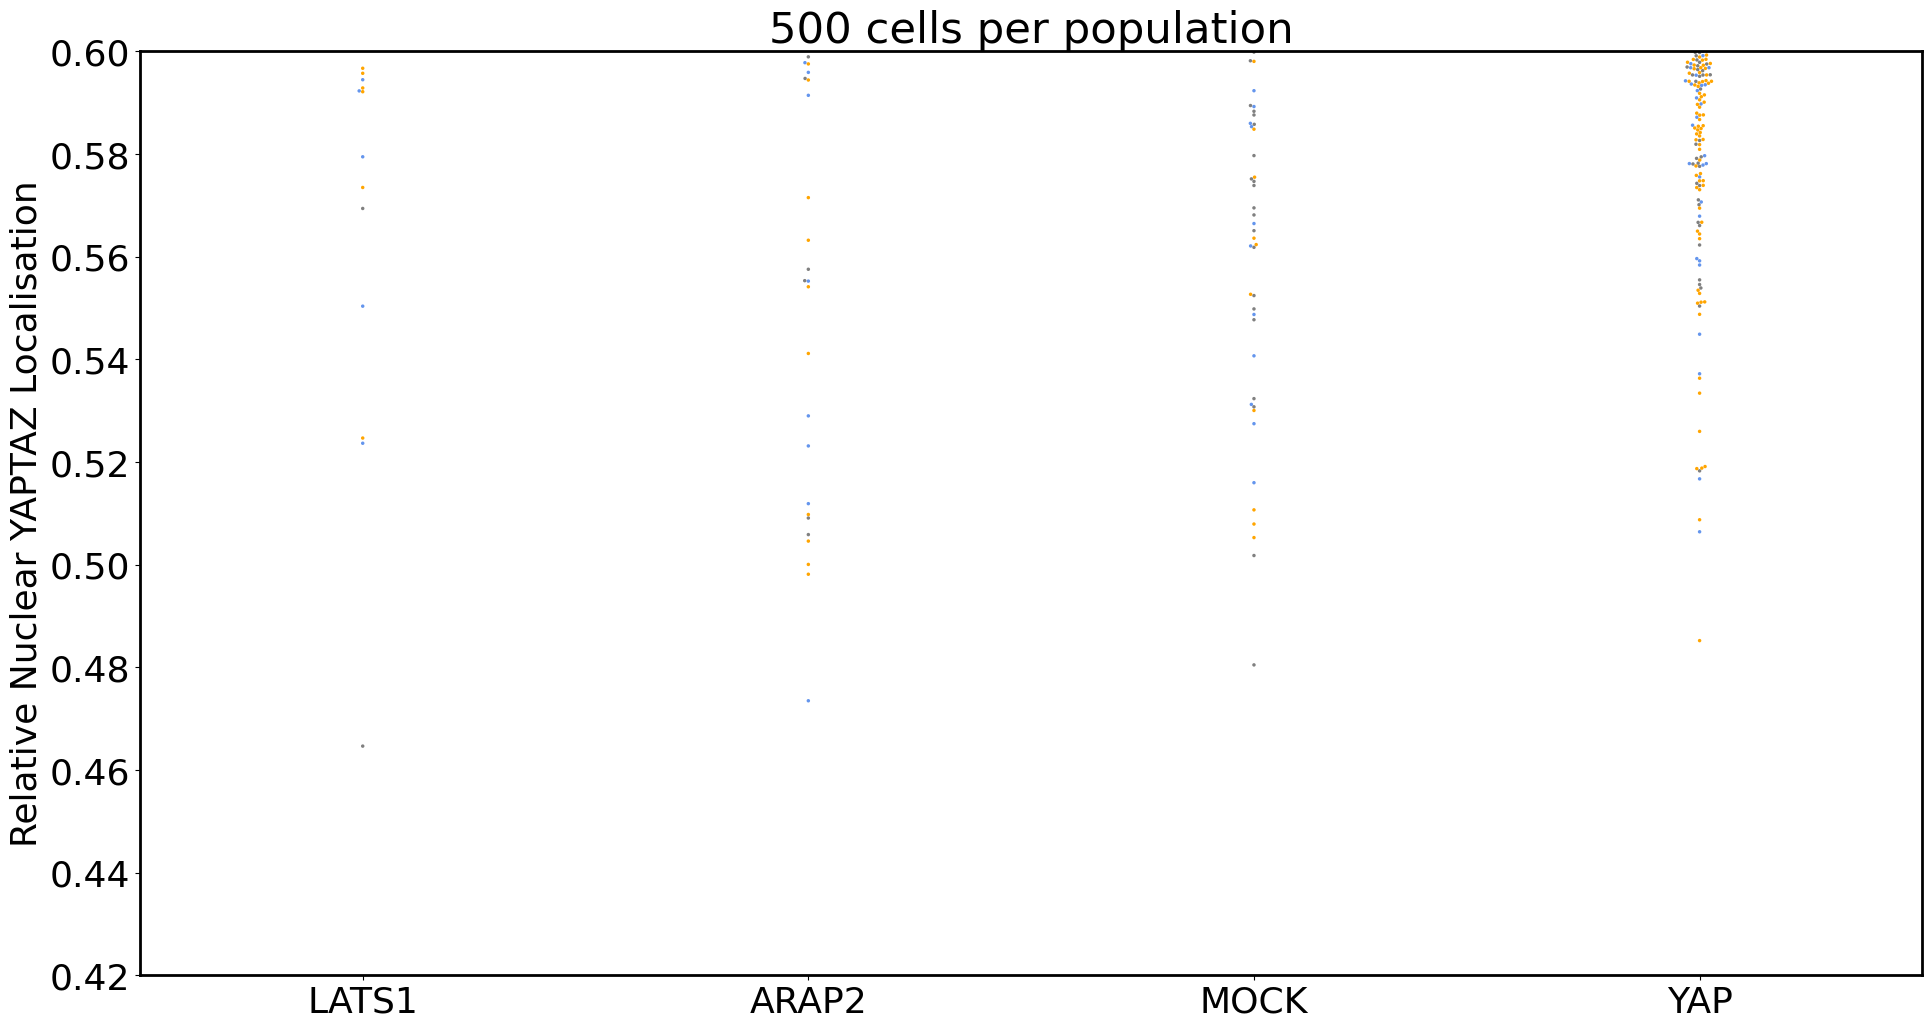

In [8]:
selected_treatments = ['LATS1', 'ARAP2', 'MOCK', 'YAP']
point_size = {50: 8, 200: 4, 500: 2.5}
for s in [50, 200, 500]:
    generate_superplot(selected_treatments, selected_treatments,
                       all_data, color_dict, treatment_col, variable_of_interest,
                       y_label, sample_size=s, point_size=point_size[s])

##### Supplementary Figure 1

In [ ]:
generate_swarmplot(['LATS1', 'ARAP2', 'MOCK', 'YAP'], data_subset, color_dict, treatment_col,
                   variable_of_interest, y_label, p_values=True)